# TA Evaluation

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.simplefilter('ignore')

import seaborn as sns

Utilizarea si a altor clasificatori


 Attribute Information:
  
   1. Whether of not the TA is a native English speaker (binary)
      1=English speaker, 2=non-English speaker
   2. Course instructor (categorical, 25 categories)
   3. Course (categorical, 26 categories)
   4. Summer or regular semester (binary) 1=Summer, 2=Regular
   5. Class size (numerical)
   6. Class attribute (categorical) 1=Low, 2=Medium, 3=High

8. Missing Attribute Values: None

https://archive.ics.uci.edu/ml/datasets/teaching+assistant+evaluation

https://archive.ics.uci.edu/dataset/100/teaching+assistant+evaluation


In [3]:
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/tae/tae.data'

from zipfile import ZipFile
import requests, io

url = "https://archive.ics.uci.edu/static/public/100/teaching+assistant+evaluation.zip"
r = requests.get(url, stream = True)
zf = ZipFile(io.BytesIO(r.content))
zf.extractall()


In [4]:
df = pd.read_csv("tae.data", header =  None)

In [5]:
df.columns = ['native English', 'Course instructor', 'Course', 'Summer semester', 'Class size', 'Class']

In [6]:
df

,native English,Course instructor,Course,Summer semester,Class size,Class
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
...,...,...,...,...,...,...
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   native English     151 non-null    int64
 1   Course instructor  151 non-null    int64
 2   Course             151 non-null    int64
 3   Summer semester    151 non-null    int64
 4   Class size         151 non-null    int64
 5   Class              151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [8]:
df.isnull().sum()

native English       0
Course instructor    0
Course               0
Summer semester      0
Class size           0
Class                0
dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

In [9]:
df.corr()

,native English,Course instructor,Course,Summer semester,Class size,Class
native English,1.000000,-0.250510,0.134660,0.214417,-0.151547,-0.255466
Course instructor,-0.250510,1.000000,-0.236010,-0.168573,-0.035765,0.075095
Course,0.134660,-0.236010,1.000000,0.224927,-0.033485,0.143103
Summer semester,0.214417,-0.168573,0.224927,1.000000,0.269554,-0.282742
Class size,-0.151547,-0.035765,-0.033485,0.269554,1.000000,-0.035676
Class,-0.255466,0.075095,0.143103,-0.282742,-0.035676,1.000000


<Axes: >

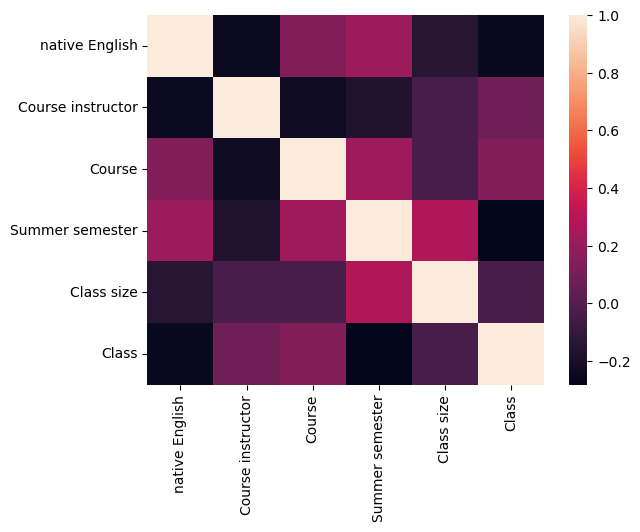

In [49]:
sns.heatmap(df.corr())

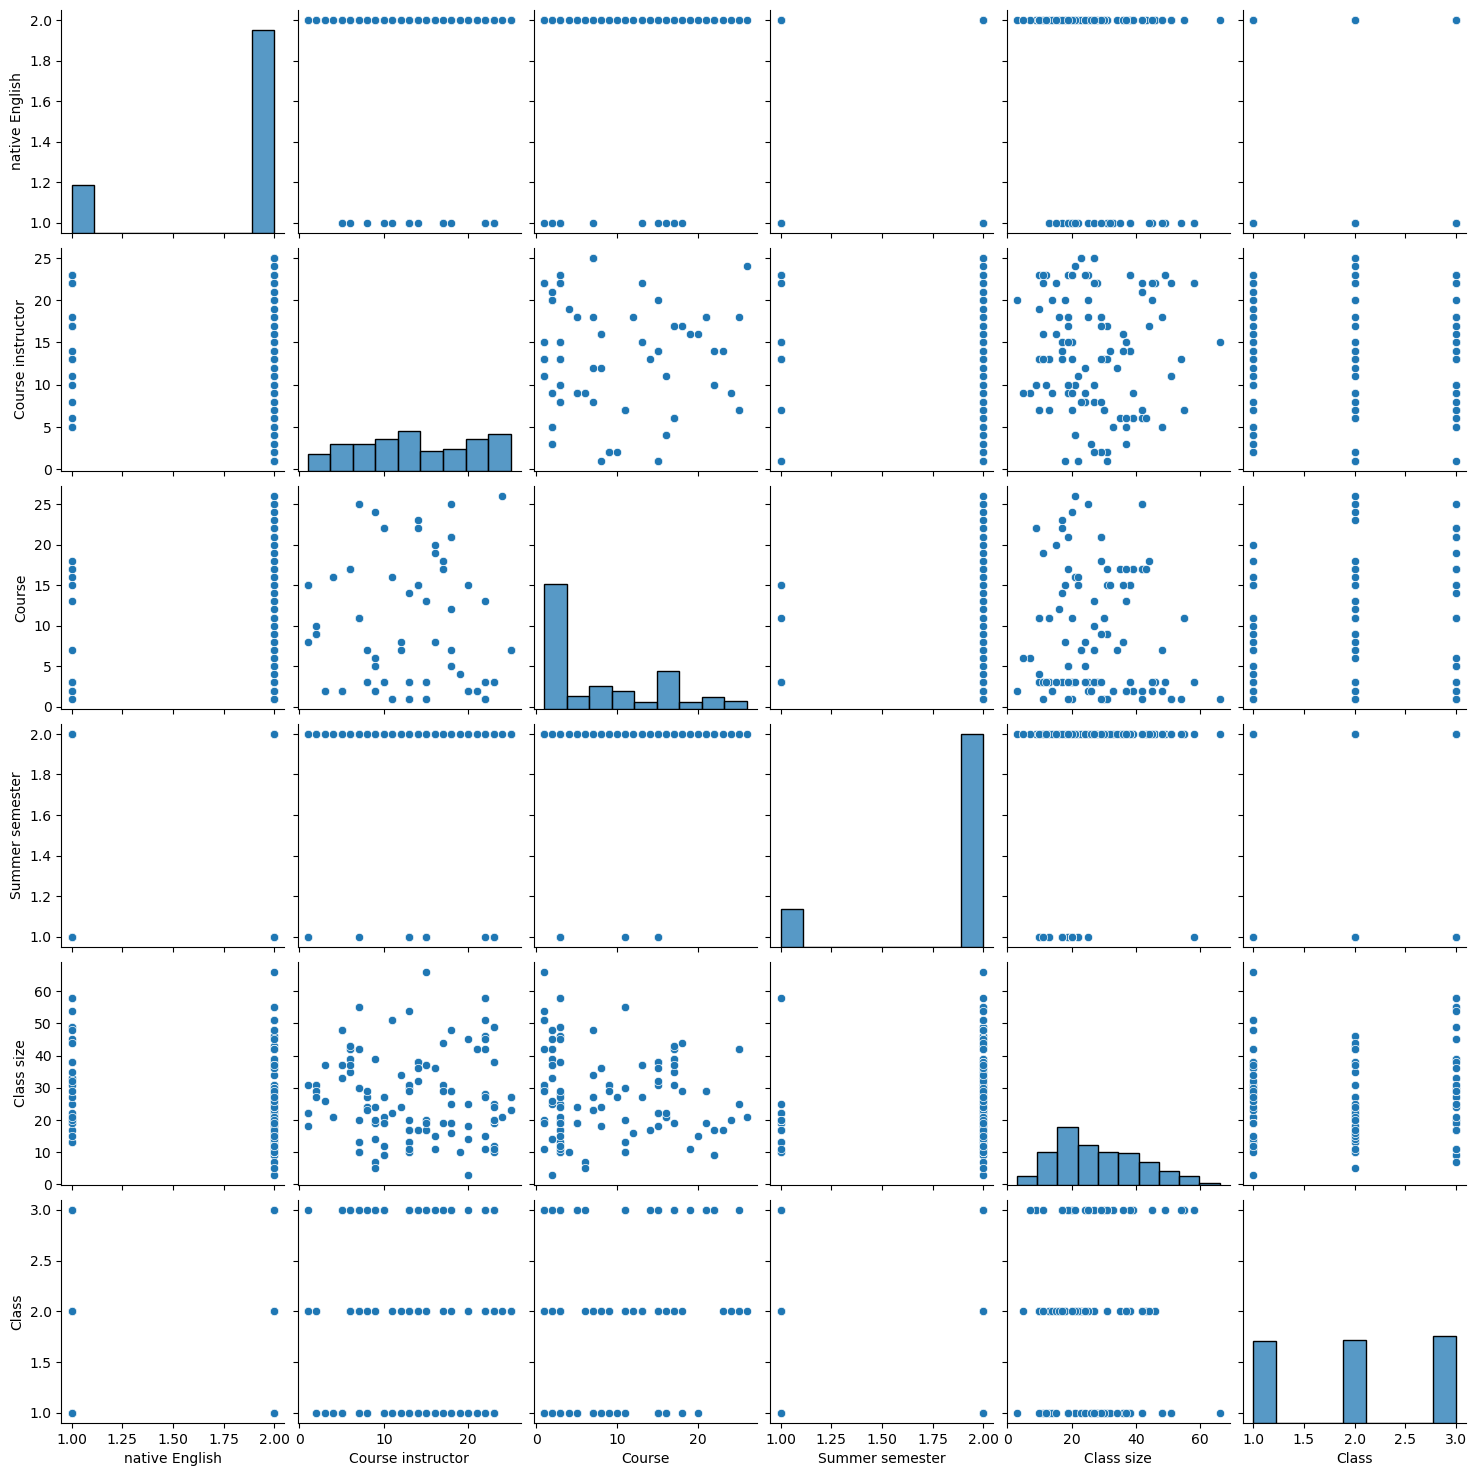

In [12]:
sns.pairplot(df)

In [14]:
a = df['Course instructor'].unique()
#print(a)
a.sort()
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

In [15]:
df.describe()

,native English,Course instructor,Course,Summer semester,Class size,Class
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [16]:
df.groupby('Course instructor')['Class'].value_counts()

Course instructor  Class
1                  2         3
                   3         1
2                  1         2
                   2         2
3                  1         2
4                  1         2
5                  1         4
                   3         2
6                  2         6
                   3         2
7                  2         6
                   3         3
                   1         2
8                  1         2
                   2         2
                   3         1
9                  3         5
                   2         3
10                 3         5
                   1         3
11                 1         2
                   2         1
12                 2         1
                   1         1
13                 3         6
                   1         5
                   2         3
14                 2         3
                   1         3
                   3         2
15                 3         4
              

In [17]:

df.groupby('Course instructor')['Class'].count()



Course instructor
1      4
2      4
3      2
4      2
5      6
6      8
7     11
8      5
9      8
10     8
11     3
12     2
13    14
14     8
15     8
16     4
17     4
18     8
19     1
20     5
21     2
22    12
23    17
24     1
25     4
Name: Class, dtype: int64

In [18]:
df.groupby('Course instructor')['Class'].mean()

Course instructor
1     2.250000
2     1.500000
3     1.000000
4     1.000000
5     1.666667
6     2.250000
7     2.090909
8     1.800000
9     2.625000
10    2.250000
11    1.333333
12    1.500000
13    2.071429
14    1.875000
15    2.250000
16    1.500000
17    2.250000
18    2.125000
19    1.000000
20    1.800000
21    1.000000
22    2.000000
23    2.352941
24    2.000000
25    2.000000
Name: Class, dtype: float64

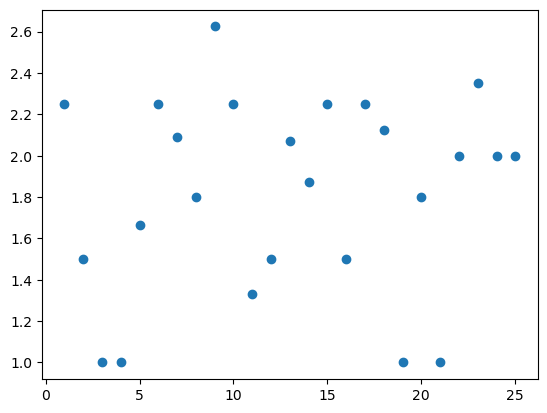

In [21]:
mean_instructor_class = df.groupby('Course instructor')['Class'].mean()
plt.plot(mean_instructor_class, 'o')
#sns.scatterplot(mean_instructor_class)

In [22]:
X_copy = df.drop(columns = ['Class'])
y = df['Class']
y
X_copy

,native English,Course instructor,Course,Summer semester,Class size
0,1,23,3,1,19
1,2,15,3,1,17
2,1,23,3,2,49
3,1,5,2,2,33
4,2,7,11,2,55
...,...,...,...,...,...
146,2,3,2,2,26
147,2,10,3,2,12
148,1,18,7,2,48
149,2,22,1,2,51


In [58]:
y

0      3
1      3
2      3
3      3
4      3
      ..
146    1
147    1
148    1
149    1
150    1
Name: Class, Length: 151, dtype: int64

# Modelarea

In [54]:
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
 
# X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size=0.2, random_state=0, stratify = y)

X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size=0.2, random_state=0)


In [55]:
#model = CategoricalNB()
#model = DecisionTreeClassifier(random_state =0)
#model = DecisionTreeClassifier(random_state=0)
model = svm.LinearSVC(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# (y_pred != y_test).sum()
# print(y_test.size)
y_pred
 

0.13245033112582782


In [56]:
y_test == y_pred


114     True
62     False
33     False
107     True
7      False
100    False
40      True
86      True
76      True
71      True
134    False
51      True
73      True
54     False
63     False
37      True
78      True
90      True
45     False
16     False
121    False
66     False
24     False
8       True
126     True
22     False
44      True
97     False
93      True
26     False
137    False
Name: Class, dtype: bool

In [57]:
error = (y_pred != y_test).sum()/y_test.size
error

0.5161290322580645

In [58]:
y_test.size
print(20*151/100)

30.2


In [59]:
model = DecisionTreeClassifier(random_state =0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [60]:
error = (y_pred != y_test).sum()/y_test.size
error

0.45161290322580644

Cu standard scaler

In [61]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_X_copy = pd.DataFrame(scaler.fit_transform(X_copy), columns = X_copy.columns)
standardized_X_copy

,native English,Course instructor,Course,Summer semester,Class size
0,-2.051072,1.375485,-0.729359,-2.359071,-0.690028
1,0.487550,0.199557,-0.729359,-2.359071,-0.845658
2,-2.051072,1.375485,-0.729359,0.423896,1.644422
3,-2.051072,-1.270352,-0.872203,0.423896,0.399382
4,0.487550,-0.976370,0.413398,0.423896,2.111312
...,...,...,...,...,...
146,0.487550,-1.564334,-0.872203,0.423896,-0.145323
147,0.487550,-0.535398,-0.729359,0.423896,-1.234733
148,-2.051072,0.640530,-0.157980,0.423896,1.566607
149,0.487550,1.228494,-1.015048,0.423896,1.800052


In [62]:
standardized_X_copy.describe()

,native English,Course instructor,Course,Summer semester,Class size
count,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02
mean,2.470430e-16,5.881976e-17,-9.190588e-17,-2.470430e-16,-7.058372e-17
std,1.003328e+00,1.003328e+00,1.003328e+00,1.003328e+00,1.003328e+00
min,-2.051072e+00,-1.858316e+00,-1.015048e+00,-2.359071e+00,-1.935068e+00
25%,4.875499e-01,-8.293795e-01,-7.293586e-01,4.238956e-01,-6.900284e-01
50%,4.875499e-01,-9.442466e-02,-5.865140e-01,4.238956e-01,-6.750838e-02
75%,4.875499e-01,9.345121e-01,9.847760e-01,4.238956e-01,7.106416e-01
max,4.875499e-01,1.669467e+00,2.556066e+00,4.238956e-01,2.967277e+00


In [63]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

standardized_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
standardized_X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)


In [64]:
#model = CategoricalNB()
#model = DecisionTreeClassifier(random_state =0)
#model = DecisionTreeClassifier(random_state=0)


model = svm.LinearSVC(random_state=0)
model.fit(standardized_X_train, y_train)
y_pred = model.predict(standardized_X_test)
(y_pred != y_test).sum()
 

12

In [65]:
error = (y_pred != y_test).sum()/y_test.size
error

0.3870967741935484

In [66]:
model = DecisionTreeClassifier(random_state =0)
model.fit(standardized_X_train, y_train)
y_pred = model.predict(standardized_X_test)

In [67]:
error = (y_pred != y_test).sum()/y_test.size
error

0.45161290322580644

In [68]:
y_test

114    1
62     2
33     1
107    1
7      3
100    2
40     3
86     3
76     1
71     1
134    2
51     3
73     1
54     2
63     2
37     1
78     3
90     3
45     3
16     2
121    3
66     2
24     2
8      3
126    3
22     2
44     3
97     2
93     3
26     2
137    2
Name: Class, dtype: int64

cu normalizer

In [69]:
from sklearn.preprocessing import Normalizer

normaliz= Normalizer().fit(X_train)
normalized_X_train =normaliz.transform(X_train)
normalized_X_test =  Normalizer().fit(X_test).transform(X_test)

model = svm.LinearSVC(random_state=0)
model.fit(normalized_X_train, y_train)
y_pred = model.predict(normalized_X_test)


In [70]:
error = (y_pred != y_test).sum()/y_test.size
error
(y_pred != y_test).sum()
error

21

In [71]:
model = DecisionTreeClassifier(random_state =0)
model.fit(normalized_X_train, y_train)
y_pred = model.predict(normalized_X_test)
y_pred

array([3, 2, 1, 1, 3, 2, 3, 2, 1, 1, 3, 3, 1, 2, 1, 1, 1, 2, 3, 2, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 2, 3], dtype=int64)

In [72]:
error = (y_pred != y_test).sum()/y_test.size
error

0.4838709677419355

# Exercitiu: 
Sa se aplice DecisionTreeClassifier pentru diferite valori ale parametrilor:
criterion = entropy, max_depth, max_leaf_nodes

In [73]:
model = DecisionTreeClassifier( criterion = 'gini', max_depth = 3, random_state =0)
model.fit(normalized_X_train, y_train)
y_pred = model.predict(normalized_X_test)

In [74]:
error = (y_pred != y_test).sum()/y_test.size
error

0.5806451612903226

[Text(0.5, 0.875, 'x[2] <= 0.351\ngini = 0.666\nsamples = 120\nvalue = [42, 38, 40]'),
 Text(0.25, 0.625, 'x[0] <= 0.036\ngini = 0.646\nsamples = 84\nvalue = [37, 20, 27]'),
 Text(0.125, 0.375, 'x[3] <= 0.031\ngini = 0.381\nsamples = 17\nvalue = [3, 1, 13]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.1875, 0.125, 'gini = 0.32\nsamples = 16\nvalue = [2, 1, 13]'),
 Text(0.375, 0.375, 'x[1] <= 0.219\ngini = 0.618\nsamples = 67\nvalue = [34, 19, 14]'),
 Text(0.3125, 0.125, 'gini = 0.18\nsamples = 10\nvalue = [9, 1, 0]'),
 Text(0.4375, 0.125, 'gini = 0.648\nsamples = 57\nvalue = [25, 18, 14]'),
 Text(0.75, 0.625, 'x[0] <= 0.045\ngini = 0.6\nsamples = 36\nvalue = [5, 18, 13]'),
 Text(0.625, 0.375, 'x[1] <= 0.352\ngini = 0.219\nsamples = 8\nvalue = [1, 7, 0]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0]'),
 Text(0.6875, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.875, 0.375, 'x[0] <= 0.092\ngini = 0.61\nsamples = 28\nva

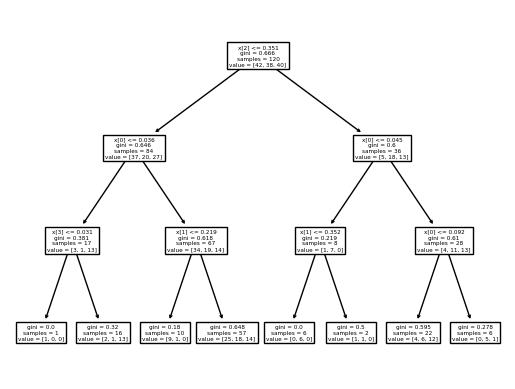

In [75]:
from sklearn import tree
tree.plot_tree(model)

In [76]:
model = svm.LinearSVC(random_state=0)
model.fit(standardized_X_train, y_train)
y_pred = model.predict(standardized_X_test)

In [77]:
error = (y_pred != y_test).sum()/y_test.size
error

0.3870967741935484

In [78]:
error = (y_pred != y_test).sum()/y_test.size
error

0.3870967741935484

# Exercitiu : 
Aplicati aceeasi clasificatori pentru colectia cu datele de intrare: "native English" si "Summer Semester".

In [79]:
def print_tree_explained(clf):
    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
    while len(stack) > 0:
        # `pop` ensures each node is only visited once
        node_id, depth = stack.pop()
        node_depth[node_id] = depth

        # If the left and right child of a node is not the same we have a split
        # node
        is_split_node = children_left[node_id] != children_right[node_id]
        # If a split node, append left and right children and depth to `stack`
        # so we can loop through them
        if is_split_node:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        else:
            is_leaves[node_id] = True

    print(
        "The binary tree structure has {n} nodes and has "
        "the following tree structure:\n".format(n=n_nodes)
    )
    for i in range(n_nodes):
        if is_leaves[i]:
            print(
                "{space}node={node} is a leaf node.".format(
                    space=node_depth[i] * "\t", node=i
                )
            )
        else:
            print(
                "{space}node={node} is a split node: "
                "go to node {left} if X[:, {feature}] <= {threshold} "
                "else to node {right}.".format(
                    space=node_depth[i] * "\t",
                    node=i,
                    left=children_left[i],
                    feature=feature[i],
                    threshold=threshold[i],
                    right=children_right[i],
                )
            )

In [80]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[6, 0, 1],
       [3, 5, 4],
       [2, 2, 8]], dtype=int64)

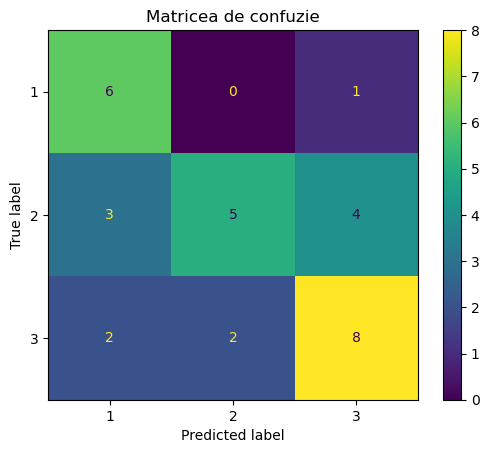

In [81]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Matricea de confuzie")
plt.show()

In [82]:
clf = DecisionTreeClassifier(max_leaf_nodes=15, random_state=0)
clf.fit(normalized_X_train, y_train)
error = (y_pred != y_test).sum()/y_test.size
error

0.3870967741935484

In [83]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 29 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 2] <= 0.3513844609260559 else to node 2.
	node=1 is a split node: go to node 3 if X[:, 0] <= 0.035647325217723846 else to node 4.
	node=2 is a split node: go to node 5 if X[:, 0] <= 0.04506182670593262 else to node 6.
		node=3 is a leaf node.
		node=4 is a split node: go to node 7 if X[:, 1] <= 0.21861137449741364 else to node 8.
		node=5 is a leaf node.
		node=6 is a split node: go to node 17 if X[:, 0] <= 0.09189144149422646 else to node 18.
			node=7 is a split node: go to node 23 if X[:, 1] <= 0.06352305226027966 else to node 24.
			node=8 is a split node: go to node 9 if X[:, 4] <= 0.9100147783756256 else to node 10.
				node=9 is a split node: go to node 11 if X[:, 3] <= 0.041017867624759674 else to node 12.
				node=10 is a split node: go to node 19 if X[:, 2] <= 0.030043844133615494 else to node 20.
					node=11 is a leaf node.
					node=12 is a split node:

[Text(0.5166666666666667, 0.95, 'x[2] <= 0.351\ngini = 0.666\nsamples = 120\nvalue = [42, 38, 40]'),
 Text(0.23333333333333334, 0.85, 'x[0] <= 0.036\ngini = 0.646\nsamples = 84\nvalue = [37, 20, 27]'),
 Text(0.16666666666666666, 0.75, 'gini = 0.381\nsamples = 17\nvalue = [3, 1, 13]'),
 Text(0.3, 0.75, 'x[1] <= 0.219\ngini = 0.618\nsamples = 67\nvalue = [34, 19, 14]'),
 Text(0.13333333333333333, 0.65, 'x[1] <= 0.064\ngini = 0.18\nsamples = 10\nvalue = [9, 1, 0]'),
 Text(0.06666666666666667, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.2, 0.55, 'gini = 0.0\nsamples = 9\nvalue = [9, 0, 0]'),
 Text(0.4666666666666667, 0.65, 'x[4] <= 0.91\ngini = 0.648\nsamples = 57\nvalue = [25, 18, 14]'),
 Text(0.3333333333333333, 0.55, 'x[3] <= 0.041\ngini = 0.621\nsamples = 47\nvalue = [22, 17, 8]'),
 Text(0.26666666666666666, 0.45, 'gini = 0.5\nsamples = 6\nvalue = [0, 3, 3]'),
 Text(0.4, 0.45, 'x[4] <= 0.892\ngini = 0.581\nsamples = 41\nvalue = [22, 14, 5]'),
 Text(0.3333333333333333, 

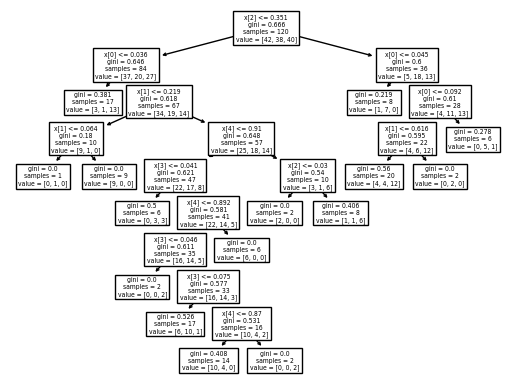

In [84]:
from sklearn import tree
tree.plot_tree(clf)

In [85]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier( alpha=1e-5,
           hidden_layer_sizes=(5,), random_state=0)


In [86]:
clf.fit(X_train, y_train)
error = (y_pred != y_test).sum()/y_test.size
error

0.3870967741935484

In [87]:
df.corr()

,native English,Course instructor,Course,Summer semester,Class size,Class
native English,1.000000,-0.250510,0.134660,0.214417,-0.151547,-0.255466
Course instructor,-0.250510,1.000000,-0.236010,-0.168573,-0.035765,0.075095
Course,0.134660,-0.236010,1.000000,0.224927,-0.033485,0.143103
Summer semester,0.214417,-0.168573,0.224927,1.000000,0.269554,-0.282742
Class size,-0.151547,-0.035765,-0.033485,0.269554,1.000000,-0.035676
Class,-0.255466,0.075095,0.143103,-0.282742,-0.035676,1.000000


In [88]:
X_copy_2 = df[['native English', 'Summer semester']]
y_2 = df['Class']
print(y_2.head())
print(X_copy_2)

0    3
1    3
2    3
3    3
4    3
Name: Class, dtype: int64
     native English  Summer semester
0                 1                1
1                 2                1
2                 1                2
3                 1                2
4                 2                2
..              ...              ...
146               2                2
147               2                2
148               1                2
149               2                2
150               2                2

[151 rows x 2 columns]


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_copy_2, y_2, test_size=0.2, random_state=0)

In [90]:
model = CategoricalNB()


In [91]:
model.fit(X_train, y_train)
error = (y_pred != y_test).sum()/y_test.size
error

0.3870967741935484

In [92]:
clf = DecisionTreeClassifier(max_leaf_nodes= 3, random_state=0)
clf.fit(X_train, y_train)
error = (y_pred != y_test).sum()/y_test.size
error

0.3870967741935484

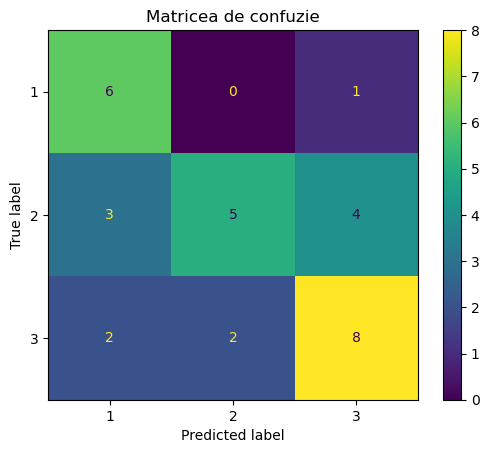

In [93]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Matricea de confuzie")
plt.show()

[Text(0.4, 0.8333333333333334, 'x[0] <= 1.5\ngini = 0.666\nsamples = 120\nvalue = [42, 38, 40]'),
 Text(0.2, 0.5, 'gini = 0.544\nsamples = 21\nvalue = [4, 4, 13]'),
 Text(0.6, 0.5, 'x[1] <= 1.5\ngini = 0.66\nsamples = 99\nvalue = [38, 34, 27]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.48\nsamples = 10\nvalue = [0, 4, 6]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.648\nsamples = 89\nvalue = [38, 30, 21]')]

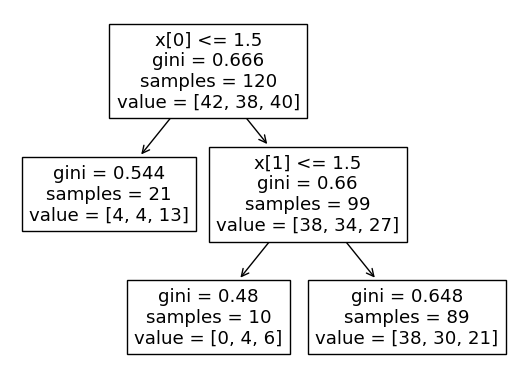

In [94]:
from sklearn import tree
tree.plot_tree(clf)

In [95]:
X_test.groupby('native English').value_counts()

native English  Summer semester
1               2                   5
                1                   3
2               2                  19
                1                   4
Name: count, dtype: int64

In [96]:
y_test


114    1
62     2
33     1
107    1
7      3
100    2
40     3
86     3
76     1
71     1
134    2
51     3
73     1
54     2
63     2
37     1
78     3
90     3
45     3
16     2
121    3
66     2
24     2
8      3
126    3
22     2
44     3
97     2
93     3
26     2
137    2
Name: Class, dtype: int64

In [97]:
df3 = pd.concat([X_test, y_test], axis = 1)
df3
df3.groupby('Class').value_counts()


Class  native English  Summer semester
1      2               2                  6
       1               1                  1
2      2               2                  9
       1               2                  2
       2               1                  1
3      2               2                  4
       1               2                  3
       2               1                  3
       1               1                  2
Name: count, dtype: int64

In [98]:
#df4 = pd.concat([X_test, y_pred], axis = 1)
#df4.groupby('native English').value_counts()


In [99]:
print_tree_explained(clf)

The binary tree structure has 5 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 0] <= 1.5 else to node 2.
	node=1 is a leaf node.
	node=2 is a split node: go to node 3 if X[:, 1] <= 1.5 else to node 4.
		node=3 is a leaf node.
		node=4 is a leaf node.


### Random Forest

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size=0.2, random_state=0)

In [101]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred =  model.predict(X_test)
error = (y_pred != y_test).sum()/y_test.size
error
X_test

,native English,Course instructor,Course,Summer semester,Class size
114,2,12,7,2,34
62,2,1,15,1,22
33,1,13,3,1,13
107,2,20,2,2,14
7,2,10,3,2,27
100,1,6,17,2,35
40,2,15,3,1,17
86,2,23,3,1,20
76,2,5,2,2,48
71,2,13,1,2,31


In [106]:
exemplu_nou = [1, 15, 3, 1,25]
model.predict([[1, 12, 3, 1,25]])

array([3], dtype=int64)

### Support Vector Machine

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size=0.2, random_state=0)

model = svm.LinearSVC(random_state=0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

error = (y_pred != y_test).sum()/y_test.size
error

0.5161290322580645

In [104]:
from sklearn.svm import SVC

model = SVC(kernel='linear', random_state = 0)
 
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

error = (y_pred != y_test).sum()/y_test.size
error

0.41935483870967744

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size=0.2, random_state=0)
model = LogisticRegression( random_state = 0)
 
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

error = (y_pred != y_test).sum()/y_test.size
error

0.3870967741935484